# 局部歸一化 (Local Normalization)
## 簡介
局部歸一化的目標是使影像亮度的mean與variance在局部相鄰區域趨於一致，用來改善不均勻照明或是遮蔽的影響。

## 實作
對原始影像$f(x,y)$的local normalization可以寫成：

$$g(x)=\frac{f(x,y)-m_{f}(x,y)}{\sigma_f(x,y)}$$
 
其中
* $m_f(x,y)$是$f(x,y)$的local mean估算值
* $\sigma_f(x,y)$是local variance的估算值
* $g(x,y)$是輸出影像

local mean與variance的估算通過Gaussian filter，$\sigma_1$與$\sigma_2$是Gaussian window size，用來控制local mean與local variance，通常$\sigma_2$應該大於$\sigma_1$。 

![diagram](https://qx8gvg.bn.files.1drv.com/y4m0ba09PJWrsnL2is21byyE8oMvX-56GfJgDO6-fEcXK8RobCa4hJcKiFRXTyZlJ5imnRJY-i0KQbintR2nrZuHbDodpOq0-XSW5cav190QJdrVqIHhY9IpgTdz7cbaDHrdSL4cRSX_fJgAYYIma3Geqf-9A9uCSQ0tWrUsno7qi32vtxdY0ghHNkW7Hxas9WGfDXbk0aEeTRm7ko4mCw4HA?width=618&height=137&cropmode=none)

## 範例

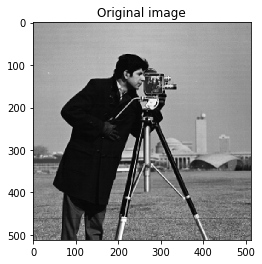

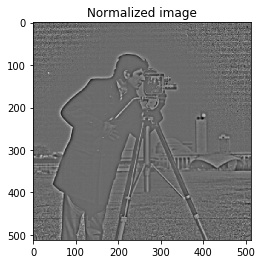

In [2]:
%matplotlib inline

import scipy as sp
import skimage.filters as fil
import matplotlib.pyplot as plt

from skimage.color import rgb2gray
from skimage.data import camera
from skimage import img_as_float

def local_norm(img, sigma_1, sigma_2):

    local_mean = fil.gaussian(img, sigma_1)
    numerator = img - local_mean
    local_variance = fil.gaussian(numerator**2, sigma_2)
    denominator = local_variance**(0.5)
    output = numerator / denominator
    output = output + abs(output.min())
    output = output / output.max()

    return output

img = img_as_float(camera())
img = img / img.max()

sigma_1 = 4
sigma_2 = 40
normalized = local_norm(img, sigma_1, sigma_2)

plt.figure()
plt.title('Original image')
plt.imshow(img, 'gray')

plt.figure()
plt.title('Normalized image')
plt.imshow(normalized, 'gray')
plt.show()

## 參考
[Local Normalization](http://bigwww.epfl.ch/sage/soft/localnormalization/)